Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

    Missing values in a dataset are the values that are not available or are unknown for certain observations or variables in a dataset. In a dataset, missing values can be represented in different ways, such as null, NaN (Not a Number), or a blank space. The presence of missing values can have a significant impact on the quality of analysis and predictions made from the data, as they can cause biases, errors, and reduce the accuracy of the results. 

    Handling missing values in a dataset is essential because it can have a significant impact on the quality and accuracy of data analysis and modeling. Ignoring missing values can lead to biased or inaccurate results, while handling them appropriately can increase the accuracy and robustness of the analysis. Missing values can reduce the efficiency of machine learning models and degrade their predictive accuracy.

    Some algorithms that are not affected by missing values are:
    1. Decision Trees: Decision Trees are robust to missing values because they make decisions based on only one variable at a time, and missing values can be handled by assigning a surrogate split.

    2. Random Forests: Random Forests are also robust to missing values because they use a combination of multiple decision trees, and missing values can be handled by assigning surrogate splits.

    3. Support Vector Machines (SVM): SVMs can handle missing values by removing the missing values during training and testing or by imputing them with a reasonable value.

    4. Bayesian Networks: Bayesian Networks can handle missing values using probabilistic inference by treating missing values as missing data and estimating their values based on the observed data.

Q2: List down techniques used to handle missing data. Give an example of each with python code.

    Techniques to handle missing data with example of python code are:

1. To drop the columns or rows which contains NaN values

In [1]:
import seaborn as sns

# create a sample dataset with missing values
df = sns.load_dataset("titanic")

# drop rows with missing values
df_drop_rows = df.dropna(axis=0)

# drop columns with missing values
df_drop_cols = df.dropna(axis=1)

2. Imputation technique in which we handle missing data by filling the missing data with mean of the data or median of data or mode of data

In [2]:
df['age_mean'] = df['age'].fillna(df['age'].mean()) 
df[['age', 'age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [3]:
df['age_median'] = df['age'].fillna(df['age'].median())
df[['age', 'age_median']]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [4]:
mode = mode=df[df['age'].notna()]['embarked'].mode()[0]
df['embarked_mode'] = df['embarked'].fillna(mode)
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


2. To handle imbalanced dataset we use Upsampling and Downsampling

In [5]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

#set the random seed for reproducibility
np.random.seed(123)

#create a dataframe with two classes
n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})
df = pd.concat([class_0, class_1]).reset_index(drop=True)

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

# upsampling
df_minority_upsample = resample(df_minority, 
                                replace=True, # Sample with replacement
                                n_samples=len(df_majority), # to match the majority class
                                random_state=42
                        )

# downsampling
df_majority_downsample = resample(df_majority, 
                                replace=False, # Sample with replacement
                                n_samples=len(df_minority), # to match the majority class
                                random_state=42
                        )

df_upsampled = pd.concat([df_majority, df_minority_upsample])
df_downsample = pd.concat([df_minority, df_majority_downsample])

print("Upsampling")
print(df_upsampled['target'].value_counts())
print("Downsampling")
print(df_downsample['target'].value_counts())

Upsampling
0    900
1    900
Name: target, dtype: int64
Downsampling
1    100
0    100
Name: target, dtype: int64


3. Handle missing dataset using SMOTE

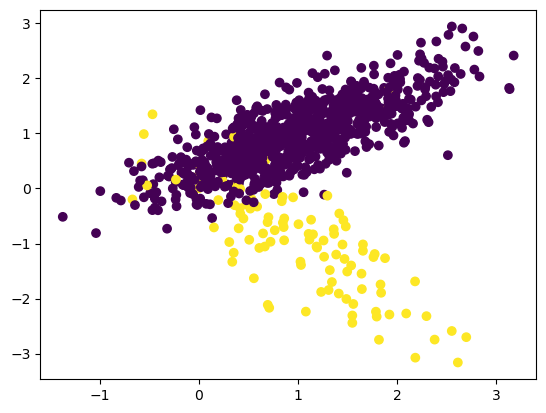

In [6]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# x = independent feature
# y = dependent feature
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=1)

df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
# before smote
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

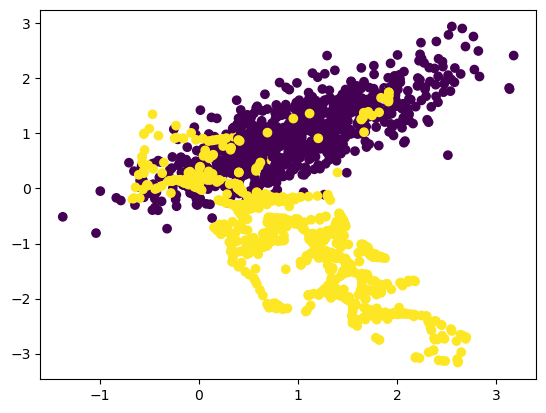

In [7]:
# transform the dataset
oversample = SMOTE()
x1, y1 = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

df1 = pd.DataFrame(x1, columns=['f1', 'f2'])
df2 = pd.DataFrame(y1, columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1)

# after smote
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])

Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

    Imbalanced Dataset “also called an unbalanced dataset ” refer to datasets where the observations or target class is skewed or has uneven distribution. This means that one class label has a very fewer number of observations and the other has very high numbers of observations. If there is the very high different between the positive values and negative values. Then we can say our dataset in Imbalance Dataset.
    
    If imbalanced data is not handled properly, it can lead to biased models that perform poorly on the minority class. 

Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

    Upsampling or Oversampling refers to the technique to create artificial or duplicate data points of the minority class sample to balance the class label.  There are various oversampling techniques that can be used to create artificial data points like SMOTE(Synthetic Minority Over-sampling Technique). In Up-sampling, samples from minority classes are randomly duplicated so as to achieve equivalence with the majority class.
    
    Down/Under Sampling is the process of randomly selecting samples of majority class and removing them in order to prevent them from dominating over the minority class in the dataset. There are various undersampling techniques implemented in the imblearn package including: Random Under Sampling.
    
    When up-sampling is required: suppose we have a binary classification problem where the positive class (class 1) is only 10% of the dataset. We can use up-sampling to increase the number of instances in the positive class to balance the dataset with the negative class (class 0).
    
    When down-sampling is required: suppose we have a multi-class classification problem with three classes, where class 1 is 60% of the dataset, class 2 is 30%, and class 3 is 10%. We can use down-sampling to reduce the number of instances in class 1 and 2 to balance the dataset with class 3.

Q5: What is data Augmentation? Explain SMOTE.

    Data augmentation is a technique that can be used to artificially expand the size of a training set by creating modified data from the existing one. It is a good practice to use data Augmentation if we want to prevent overfitting, or the initial dataset is too small to train on, or even if we want to squeeze better performance from our model.
    
    SMOTE(Synthetic Minority Over-sampling Technique): SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. SMOTE is a statistical technique for increasing the number of cases in the dataset in a balanced way. The component works by generating new instances from existing minority cases that we supply as input. 
    It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

Q6: What are outliers in a dataset? Why is it essential to handle outliers?

    An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact on the statistical analyses and skew the results of any hypothesis tests. 
    
    It is essential to handle outliers as:
    Outliers can affect the mean and standard deviation of the data, leading to incorrect interpretations of the data's central tendency and variability. Outliers can also affect the correlation between features, which can lead to incorrect assumptions about the relationships between variables. Outliers can also cause overfitting, where the model is too closely fit to the training data and performs poorly on new data.

Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

    If the data is missing from balance dataset we can use :
    we can handle missing value by drop row or column which consist of NaN values, but it is not good practice.
    Imputation techiques
    1. Mean value technique
    2. Median value imputation
    3. Mode value imputation
    
    If the data is missing from imbalanced dataset we can use:
    1. Up-sampling 
    2. Down-sampling
    3. SMOTE

Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

    If there is a pattern to the missing data then it must be a balanced dataset.
    To determine Missing data we can use Imputation techniques:
    1. we can drop row or column which contain missing values. But it is not good because we can lose data.
    2. Mean value imputation: we can fill NaN value with mean of the data. 
    3. Median value imputation: we can fill NaN value with the median of the data.
    4. Mode value imputation: For categorical value we can fill missing value with the calculated mode of the data.

Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

    When dealing imbalanced dataset, in the case of medical diagnosis where the majority of patients do not have the condition of interest, standard performance metrics like accuracy can be misleading. This is because the model may be biased towards the majority class and achieve high accuracy simply by predicting the majority class for all cases.

    Some strategies that can be used to evaluate the performance of a machine learning model on an imbalanced dataset:

    1. Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows the number of true positives, true negatives, false positives, and false negatives. This information can be used to calculate metrics such as precision, recall, F1-score, and specificity.

    2. Resampling techniques: Resampling techniques such as oversampling or undersampling can be used to balance the dataset. Oversampling refers to the technique to create artificial or duplicate data points of the minority class sample to balance the class label. Under Sampling is the process of randomly selecting samples of majority class and removing them in order to prevent them from dominating over the minority class in the dataset.

    3. SMOTE: SMOTE is a statistical technique for increasing the number of cases in the dataset in a balanced way. The component works by generating new instances from existing minority cases that we supply as input.

Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

        Methods that can be employed to down-sample the majority class:

    1. Random under-sampling: Random under-sampling involves randomly selecting examples from the majority class and discarding the rest until the number of examples in the majority class matches the number of examples in the minority class.

    2. Cluster centroids: Cluster centroids is a method that can be used to select centroids from the majority class to represent the majority class. The centroids can be selected using clustering techniques such as K-means clustering or hierarchical clustering.

Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

    Some methods that can be employed to up-sample the minority class:

    1. Random over-sampling: Random over-sampling involves randomly duplicating examples from the minority class until the number of examples in the minority class matches the number of examples in the majority class.

    2. Synthetic Minority Over-sampling Technique (SMOTE): SMOTE is a popular technique for up-sampling the minority class. SMOTE creates synthetic examples of the minority class by interpolating between existing minority class examples.

    3. Adaptive Synthetic Sampling (ADASYN): ADASYN is an extension of the SMOTE algorithm that creates more synthetic examples for minority class examples that are harder to learn. ADASYN adjusts the density of synthetic examples based on the local density of the data. 